In [6]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import datetime
from datetime import timedelta
import math

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False
#importing data and dropping missing values

In [7]:
train = pd.read_csv("./data/2020빅콘데이터/01_제공데이터/4, 5차전처리(실적)_의류상세추가.csv", encoding="cp949")
train.head()

,방송일시,상세구분,판매단가,마더코드,상품명,상품코드,상품군,판매단가개수,상품명2,노출(분),취급액,판매건수
0,2019-01-01 6:00,남성상의(동),39900,100346,테이트 남성 셀린니트3종,201072,의류,1,테이트 남성 셀린니트3종 399,60.0,12033000,303
1,2019-01-01 6:00,여성상의(동),39900,100346,테이트 여성 셀린니트3종,201079,의류,1,테이트 여성 셀린니트3종 399,60.0,20663000,520
2,2019-01-01 7:00,여성,59000,100305,오모떼 레이스 파운데이션 브라,200974,속옷,1,오모떼 레이스 파운데이션 브라 590,60.0,47878000,812
3,2019-01-01 8:00,남성하의(동),59900,100808,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,202377,의류,1,CERINI by PAT 남성 소프트 기모 릴렉스팬츠 599,60.0,99736000,1666
4,2019-01-01 9:00,여성코트,79000,100816,보코 리버시블 무스탕,202404,의류,2,보코 리버시블 무스탕 790,60.0,90973000,1153


In [8]:
train["방송일시"] = pd.to_datetime(train["방송일시"]) + timedelta(hours=-3)

train["방송일"] = train["방송일시"].dt.date

In [9]:
train.head()

,방송일시,상세구분,판매단가,마더코드,상품명,상품코드,상품군,판매단가개수,상품명2,노출(분),취급액,판매건수,방송일
0,2019-01-01 03:00:00,남성상의(동),39900,100346,테이트 남성 셀린니트3종,201072,의류,1,테이트 남성 셀린니트3종 399,60.0,12033000,303,2019-01-01
1,2019-01-01 03:00:00,여성상의(동),39900,100346,테이트 여성 셀린니트3종,201079,의류,1,테이트 여성 셀린니트3종 399,60.0,20663000,520,2019-01-01
2,2019-01-01 04:00:00,여성,59000,100305,오모떼 레이스 파운데이션 브라,200974,속옷,1,오모떼 레이스 파운데이션 브라 590,60.0,47878000,812,2019-01-01
3,2019-01-01 05:00:00,남성하의(동),59900,100808,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,202377,의류,1,CERINI by PAT 남성 소프트 기모 릴렉스팬츠 599,60.0,99736000,1666,2019-01-01
4,2019-01-01 06:00:00,여성코트,79000,100816,보코 리버시블 무스탕,202404,의류,2,보코 리버시블 무스탕 790,60.0,90973000,1153,2019-01-01


In [10]:
train2 = train.groupby(["상품군", "방송일"]).sum()
train2 = train2.reset_index()
train2

,상품군,방송일,판매단가,마더코드,상품코드,판매단가개수,노출(분),취급액,판매건수
0,가구,2019-02-01,1794000,300615,602196,3,180.0,169247000,290
1,가구,2019-02-04,1794000,300615,602196,3,180.0,150677000,258
2,가구,2019-02-06,1794000,300615,602196,3,180.0,178832000,308
3,가구,2019-02-08,1794000,300615,602196,3,180.0,217876000,380
4,가구,2019-02-12,3444000,603000,1209036,6,340.0,164505000,306
...,...,...,...,...,...,...,...,...,...
2979,침구,2019-11-11,299600,400572,801582,4,240.0,96350000,1331
2980,침구,2019-11-13,299600,400572,801582,4,240.0,108818000,1520
2981,침구,2019-11-19,299600,400572,801582,4,240.0,110848000,1532
2982,침구,2019-11-21,299600,400572,801582,4,240.0,122006000,1644


In [11]:
# 일별 실적 시각화

# sales_day : 판매건수
# sales2_day : 취급액


def sales_day(category, month = 0, max_month = None, day = None, max_day = None):       # month 0 입력시 1년기간 출력
    plt.figure(figsize=(20,10))
    
    if(month==0):
        for ct in category:
            train2["방송일"] = pd.to_datetime(train2["방송일"])
            df = train2[train2["상품군"]==ct].set_index("방송일")["판매건수"]
            plt.plot(df)
    else:
        if max_month == None:
            max_month = month
        if day == None:
            for ct in category:
                train2["방송일"] = pd.to_datetime(train2["방송일"])
                df = train2[(train2["상품군"]==ct) & (train2["방송일"].dt.month>=month) & (train2["방송일"].dt.month<=max_month)].set_index("방송일")["판매건수"]
                plt.plot(df)
        else:
            for ct in category:
                train2["방송일"] = pd.to_datetime(train2["방송일"])
                df = train2[(train2["상품군"]==ct) & (train2["방송일"].dt.month==month) & (train2["방송일"].dt.day>=day) & (train2["방송일"].dt.day<=max_day)].set_index("방송일")["판매건수"]
                plt.plot(df)
            
    plt.legend(category, loc="upper right", fontsize="x-large")

    return plt.plot()


def sales2_day(category, month = 0, max_month = None, day = None, max_day = None):       # month 0 입력시 1년기간 출력
    plt.figure(figsize=(20,10))
    
    if(month==0):
        for ct in category:
            train2["방송일"] = pd.to_datetime(train2["방송일"])
            df = train2[train2["상품군"]==ct].set_index("방송일")["취급액"]
            plt.plot(df)
    else:
        if max_month == None:
            max_month = month
        if day == None:
            for ct in category:
                train2["방송일"] = pd.to_datetime(train2["방송일"])
                df = train2[(train2["상품군"]==ct) & (train2["방송일"].dt.month>=month) & (train2["방송일"].dt.month<=max_month)].set_index("방송일")["취급액"]
                plt.plot(df)
        else:
            for ct in category:
                train2["방송일"] = pd.to_datetime(train2["방송일"])
                df = train2[(train2["상품군"]==ct) & (train2["방송일"].dt.month==month) & (train2["방송일"].dt.day>=day) & (train2["방송일"].dt.day<=max_day)].set_index("방송일")["취급액"]
                plt.plot(df)
            
    plt.legend(category, loc="upper right", fontsize="x-large")

    return plt.plot()

In [12]:
category = ["의류", "침구"]
[("판매건수", ct) for ct in category]

[('판매건수', '의류'), ('판매건수', '침구')]

In [13]:
# 상품군 list

goodslist = list(train2["상품군"].unique())
goodslist

['가구', '가전', '건강기능', '농수축', '생활용품', '속옷', '의류', '이미용', '잡화', '주방', '침구']

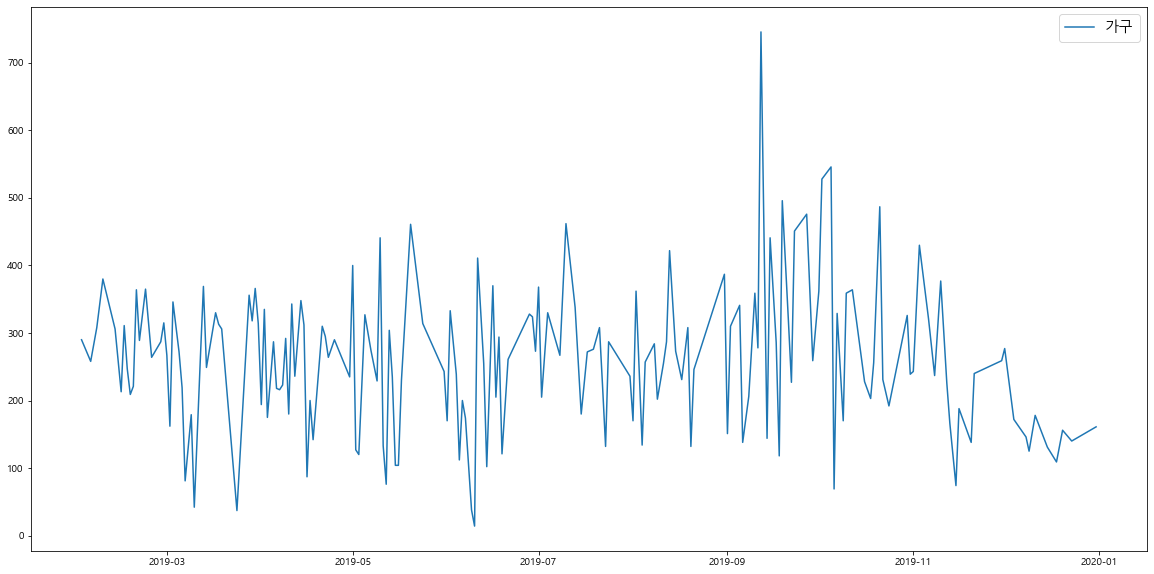

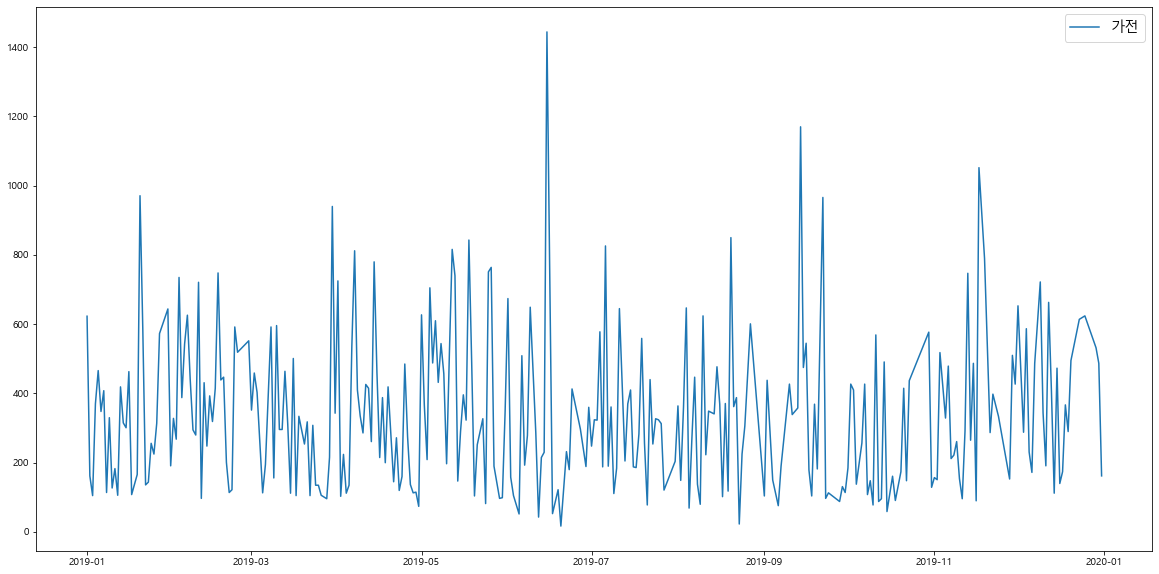

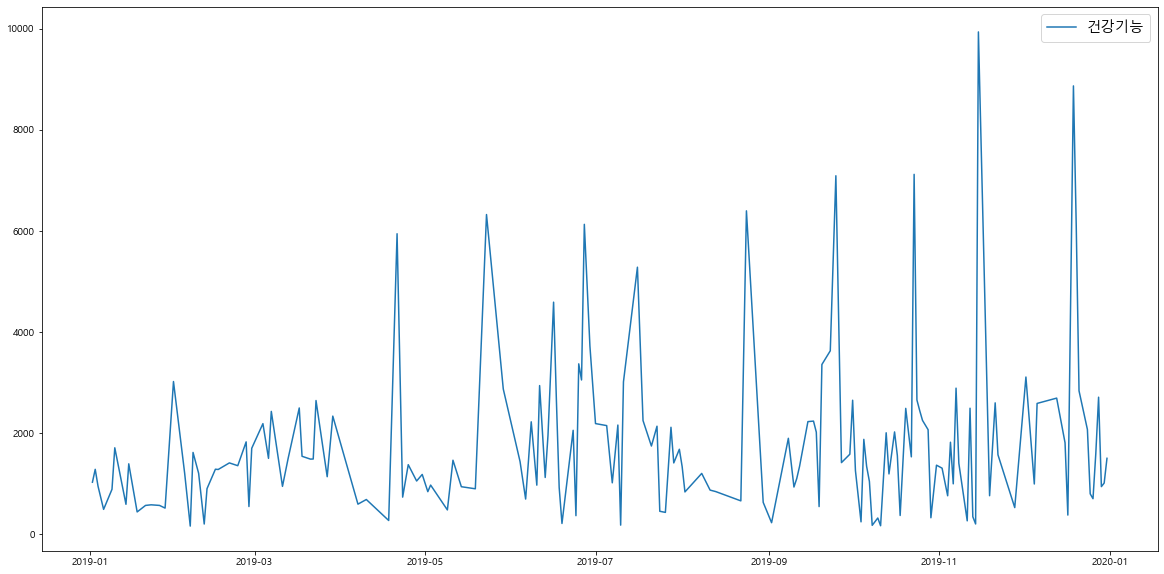

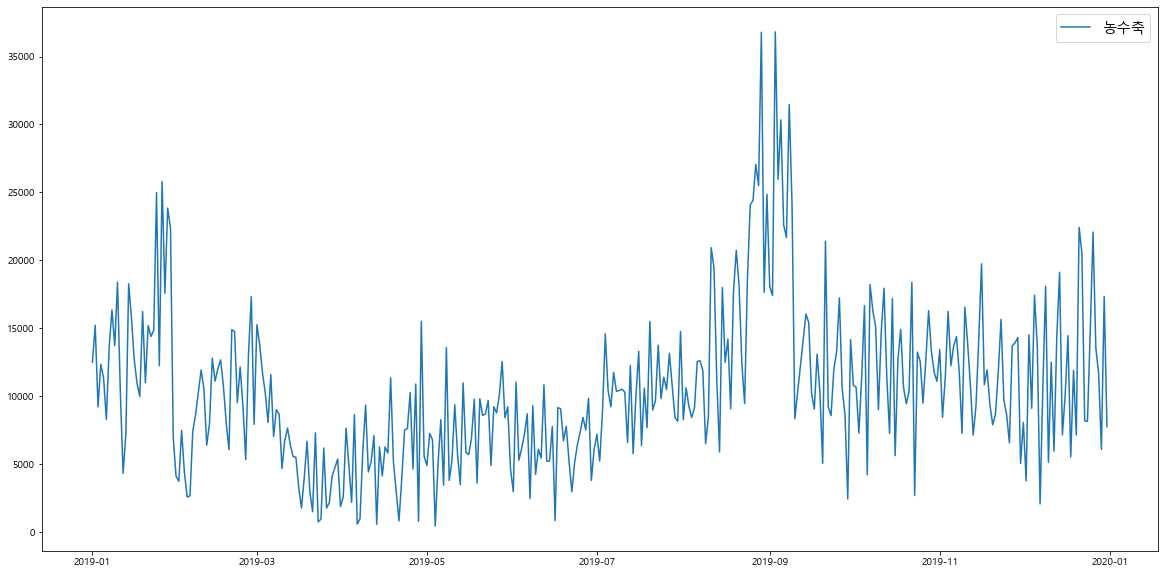

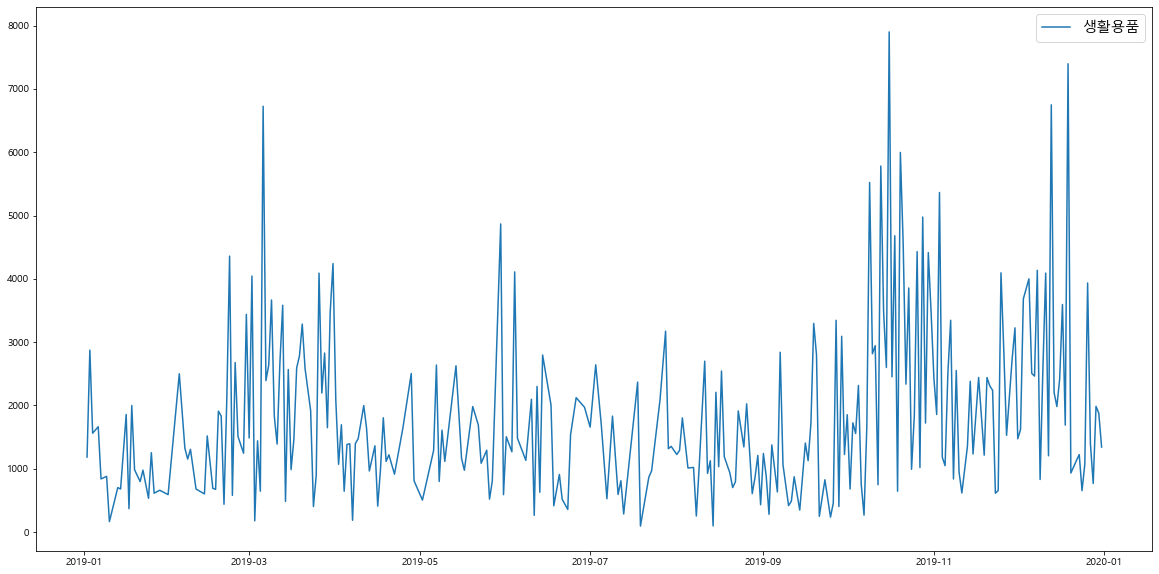

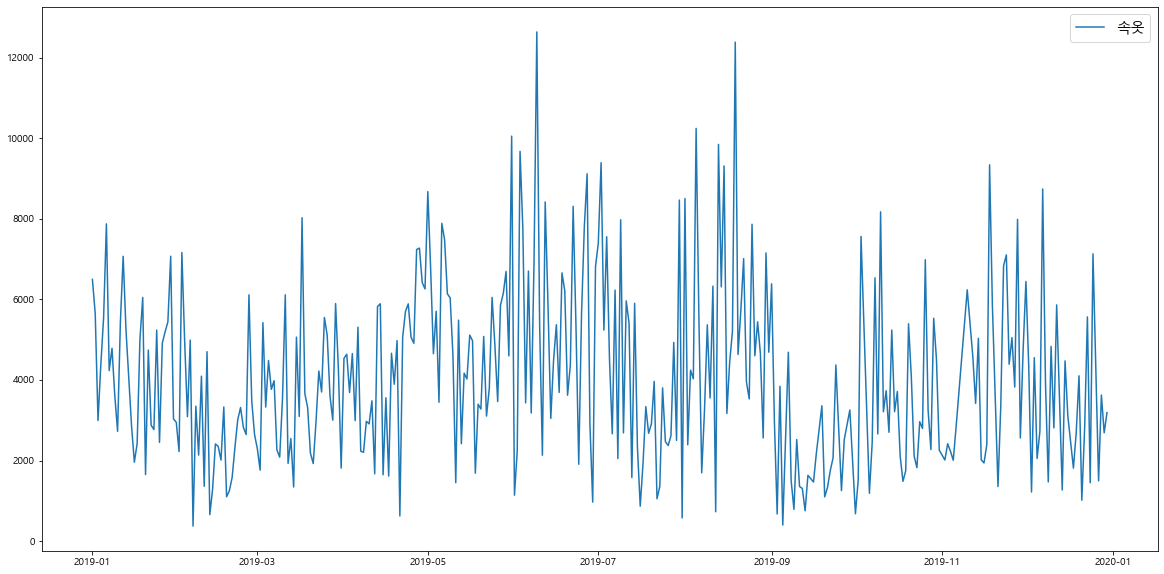

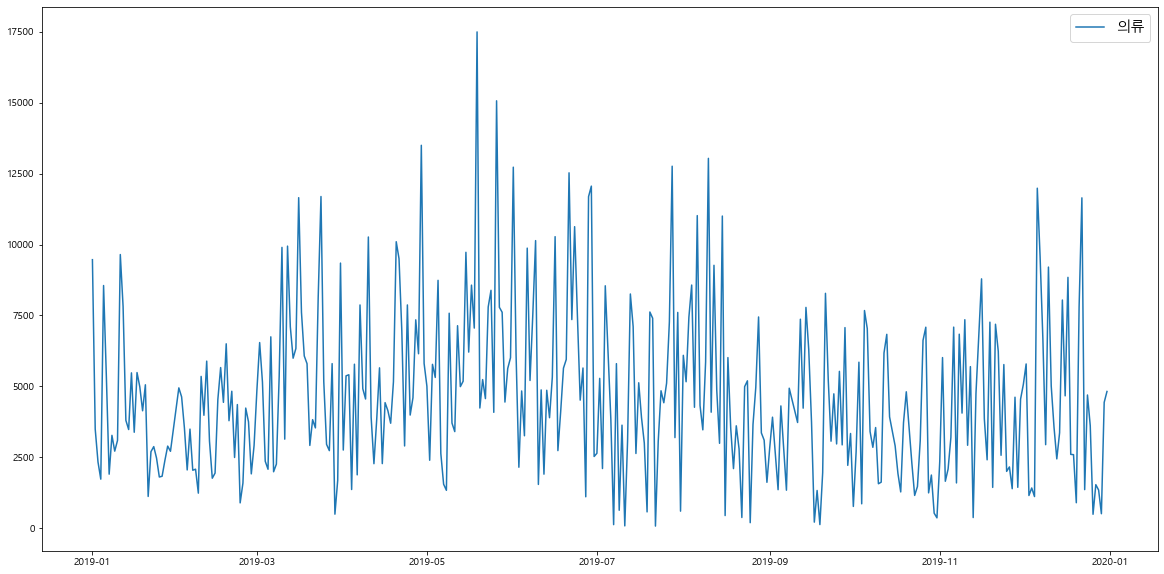

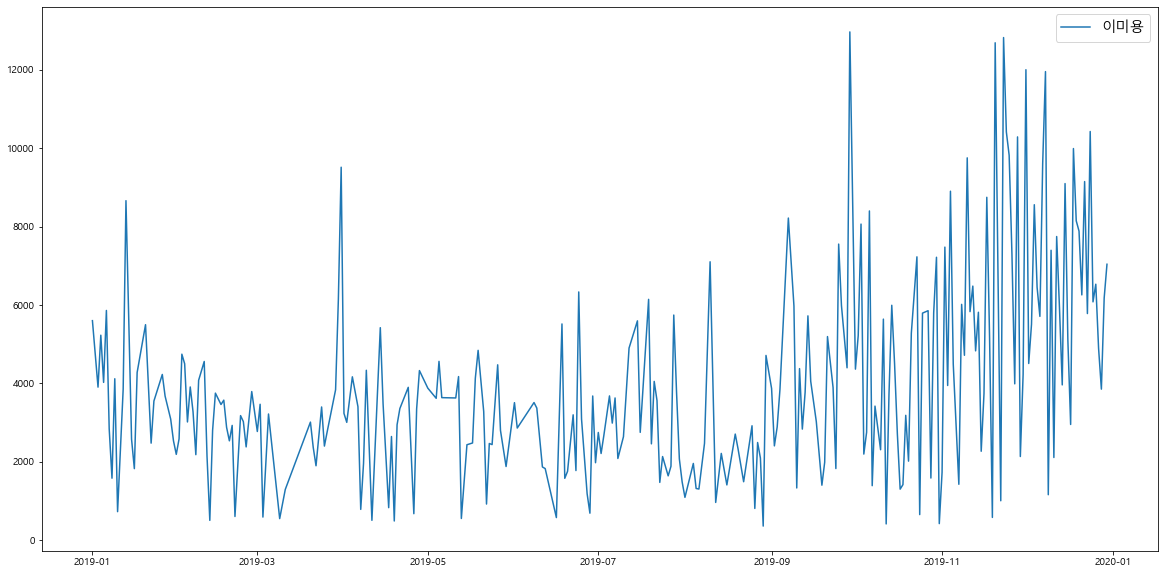

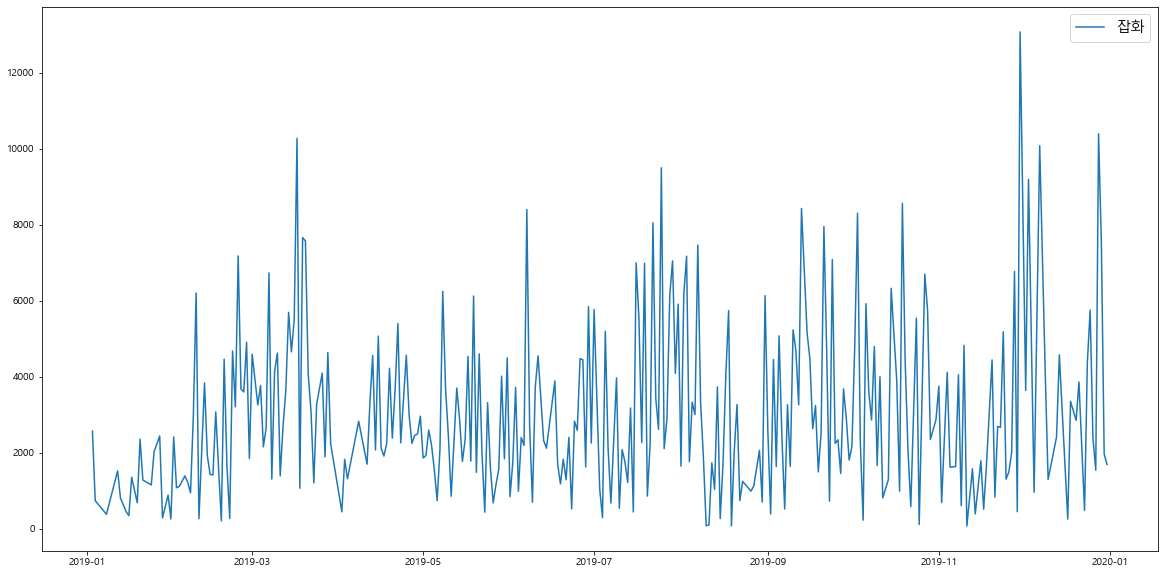

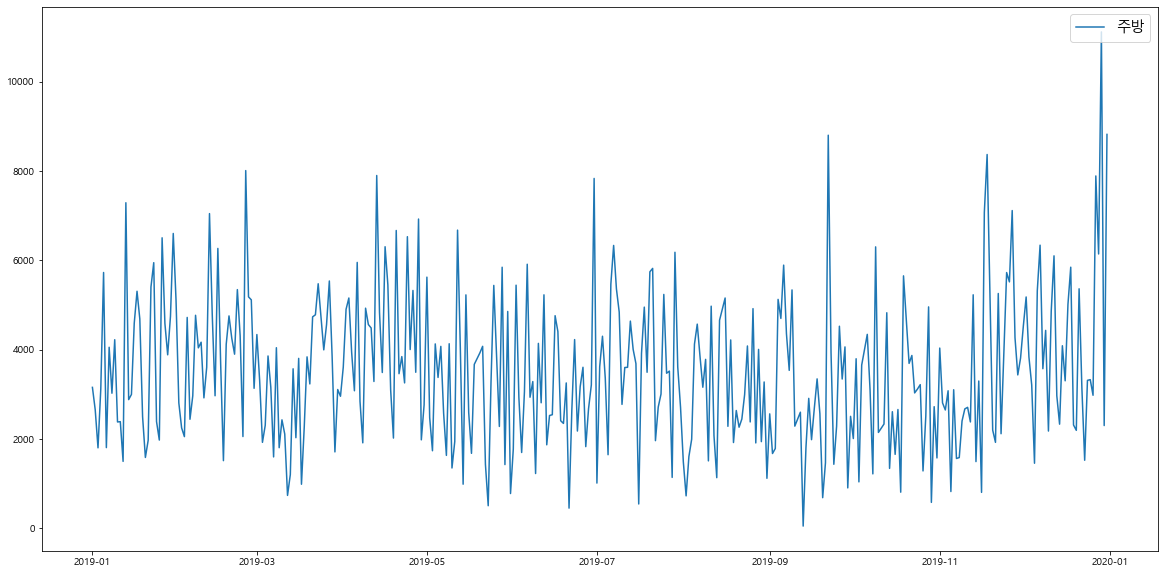

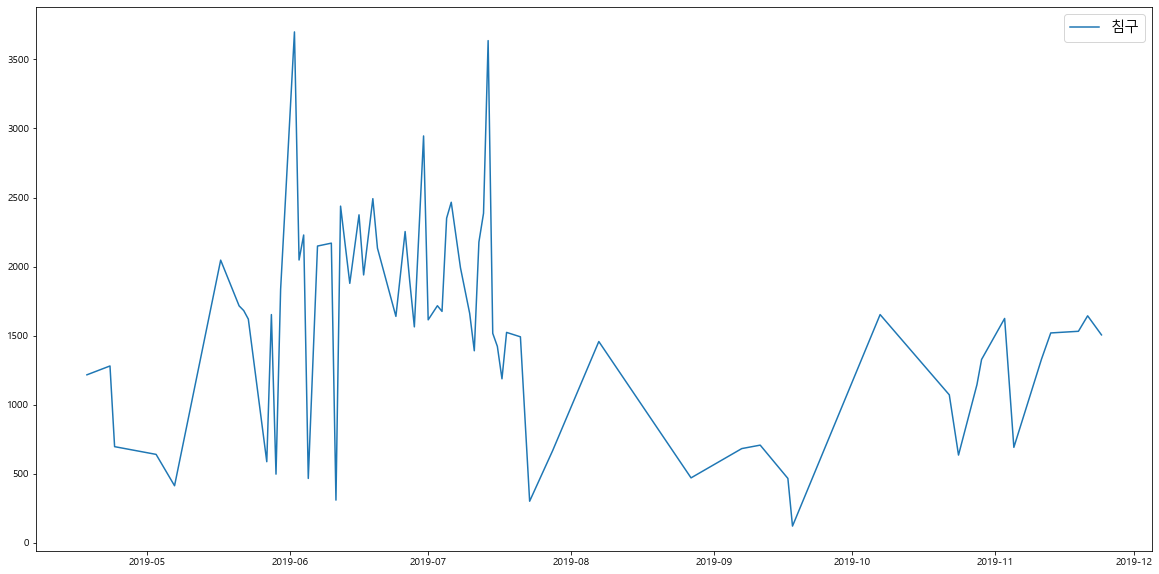

In [14]:
for goods in goodslist:
    sales_day([goods],0)
    # plt.savefig('./상품군별_개수_' + goods +'.png', dpi=300)

[]

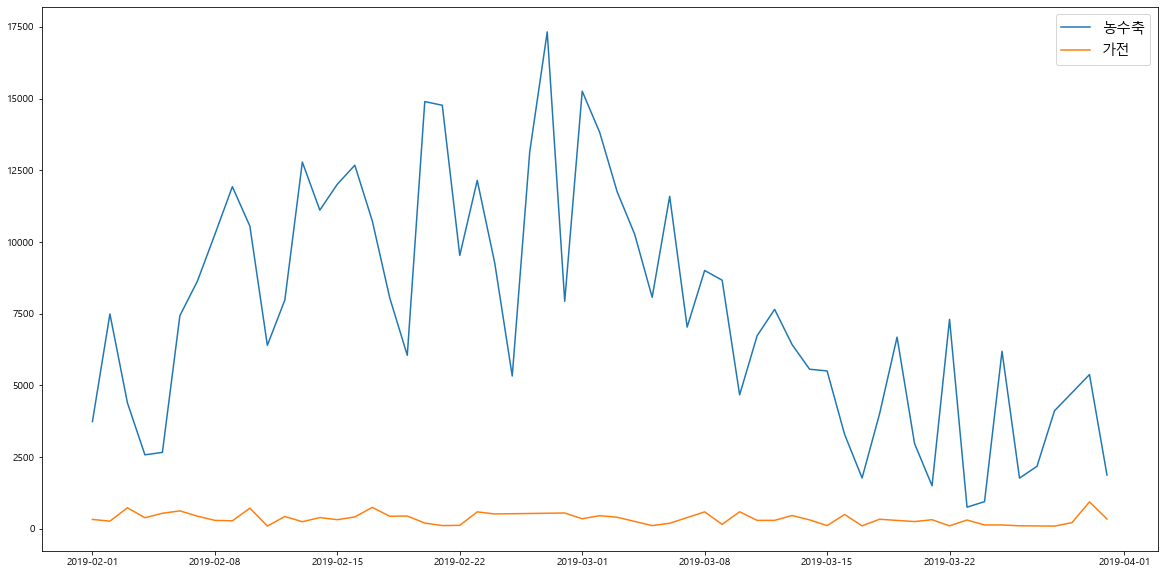

In [15]:
sales_day(["농수축", "가전"], 2, 3)

[]

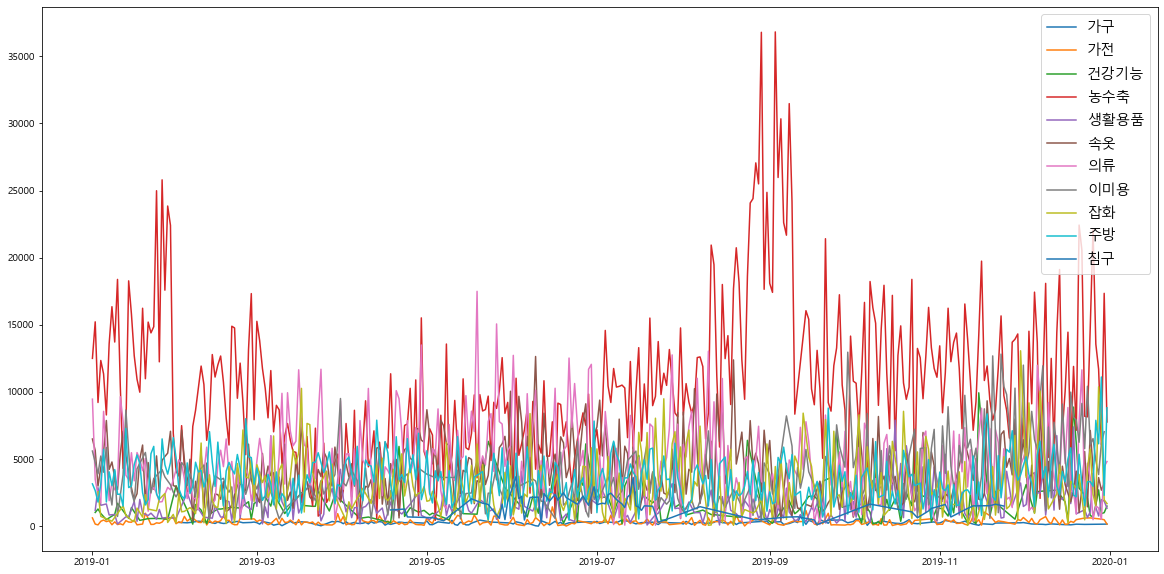

In [16]:
sales_day(goodslist, 0)

In [17]:
goodslist = list(train["상품군"].unique())
for i in goodslist:
    print(i, train[train["상품군"]==i]["상세구분"].unique())

의류 ['남성상의(동)' '여성상의(동)' '남성하의(동)' '여성코트' '남성코트' '여성재킷' '여성상하의세트' '남성상하의세트'
 '여성패딩' '공용상의(동)' '남성패딩' '남성하의(일)' '여성하의(일)' '여성하의(동)' '여성상의(하)' '남성상의(하)'
 '남성재킷' '아동복' '여성하의(하)' '남성하의(하)' '블라우스/원피스' '공용상하의세트' '공용상의(하)' '남성레쉬가드'
 '여성레쉬가드']
속옷 ['여성' '남성']
주방 ['주방용품' '주방가전' '주방잡화']
농수축 ['가공식품' '해산류' '채소류' '육류']
이미용 ['남성' '화장품' '목욕용품' '헤어']
가전 ['세탁' '냉장고' 'TV' '컴퓨터' '생활가전' '에어컨']
생활용품 ['수납/정리용품' '세제/욕실/위생' '생활잡화' '건강/안마/실버' '세탁/청소용품' '주방용품/식기' '팬시/문구/악기/취미']
건강기능 ['건강기능' '전통건강' '홍삼' '다이어트']
잡화 ['패션슈즈' '가방/패션잡화' '쥬얼리/시계' '수입명품']
가구 ['침실가구' '거실가구' '시공/DIY' '수납가구']
침구 ['침구세트' '커튼' '카페트']


In [18]:
train5 = train.groupby(["상세구분", "방송일"]).sum()
train5 = train5.reset_index()
train5

,상세구분,방송일,판매단가,마더코드,상품코드,판매단가개수,노출(분),취급액,판매건수
0,TV,2019-01-02,9760000,500740,1002331,14,240.000000,151341000,85
1,TV,2019-01-03,12460000,600888,1202849,17,280.000000,175976000,105
2,TV,2019-01-05,12460000,600888,1202849,17,300.000000,270378000,150
3,TV,2019-01-08,12460000,600888,1202849,17,280.000000,207054000,114
4,TV,2019-01-10,12460000,600888,1202849,17,300.000000,215348000,127
...,...,...,...,...,...,...,...,...,...
5422,화장품,2019-12-24,59000,100766,202239,1,60.000000,168590000,2859
5423,화장품,2019-12-25,59000,100766,202239,1,60.000000,245818000,4168
5424,화장품,2019-12-26,187900,300875,602829,3,300.000000,215590000,3606
5425,화장품,2019-12-28,59000,100723,202114,1,57.166667,73672000,1250


In [19]:
# 상세구분 일별 실적 시각화

# Dsales_day : 판매건수
# Dsales2_day : 취급액


def Dsales_day(category, month = 0, max_month = None, day = None, max_day = None):       # month 0 입력시 1년기간 출력
    plt.figure(figsize=(20,10))
    
    if(month==0):
        for ct in category:
            train5["방송일"] = pd.to_datetime(train5["방송일"])
            df = train5[train5["상세구분"]==ct].set_index("방송일")["판매건수"]
            plt.plot(df)
    else:
        if max_month == None:
            max_month = month
        if day == None:
            for ct in category:
                train5["방송일"] = pd.to_datetime(train5["방송일"])
                df = train5[(train5["상세구분"]==ct) & (train5["방송일"].dt.month>=month) & (train5["방송일"].dt.month<=max_month)].set_index("방송일")["판매건수"]
                plt.plot(df)
        else:
            for ct in category:
                train5["방송일"] = pd.to_datetime(train5["방송일"])
                df = train5[(train5["상세구분"]==ct) & (train5["방송일"].dt.month==month) & (train5["방송일"].dt.day>=day) & (train5["방송일"].dt.day<=max_day)].set_index("방송일")["판매건수"]
                plt.plot(df)
            
    plt.legend(category, loc="upper right", fontsize="x-large")

    return plt.plot()


def Dsales2_day(category, month = 0, max_month = None, day = None, max_day = None):       # month 0 입력시 1년기간 출력
    plt.figure(figsize=(20,10))
    
    if(month==0):
        for ct in category:
            train5["방송일"] = pd.to_datetime(train5["방송일"])
            df = train5[train5["상세구분"]==ct].set_index("방송일")["취급액"]
            plt.plot(df)
    else:
        if max_month == None:
            max_month = month
        if day == None:
            for ct in category:
                train5["방송일"] = pd.to_datetime(train5["방송일"])
                df = train5[(train5["상세구분"]==ct) & (train5["방송일"].dt.month>=month) & (train5["방송일"].dt.month<=max_month)].set_index("방송일")["취급액"]
                plt.plot(df)
        else:
            for ct in category:
                train5["방송일"] = pd.to_datetime(train5["방송일"])
                df = train5[(train5["상세구분"]==ct) & (train5["방송일"].dt.month==month) & (train5["방송일"].dt.day>=day) & (train5["방송일"].dt.day<=max_day)].set_index("방송일")["취급액"]
                plt.plot(df)
            
    plt.legend(category, loc="upper right", fontsize="x-large")

    return plt.plot()

[]

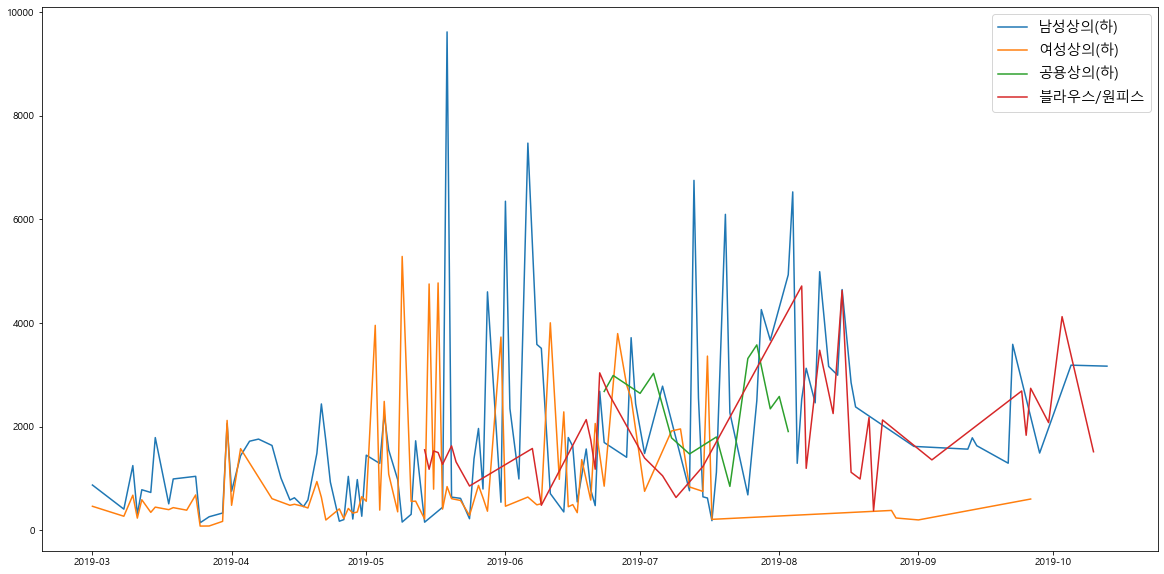

In [20]:
Dsales_day(['남성상의(하)', '여성상의(하)', '공용상의(하)', '블라우스/원피스'], month=0)

[]

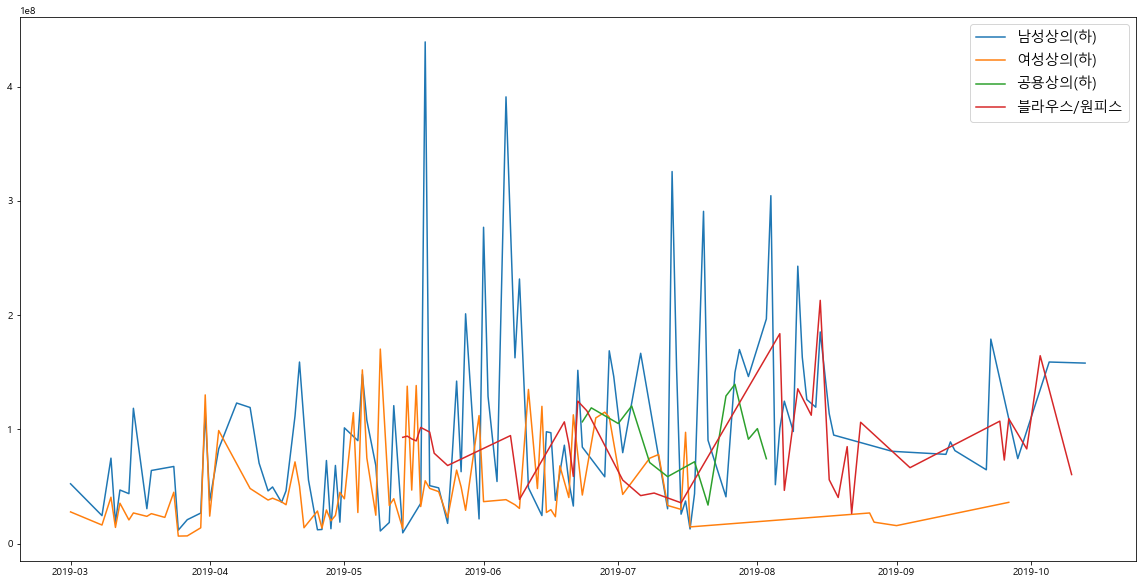

In [21]:
Dsales2_day(['남성상의(하)', '여성상의(하)', '공용상의(하)', '블라우스/원피스'], month=0)

[]

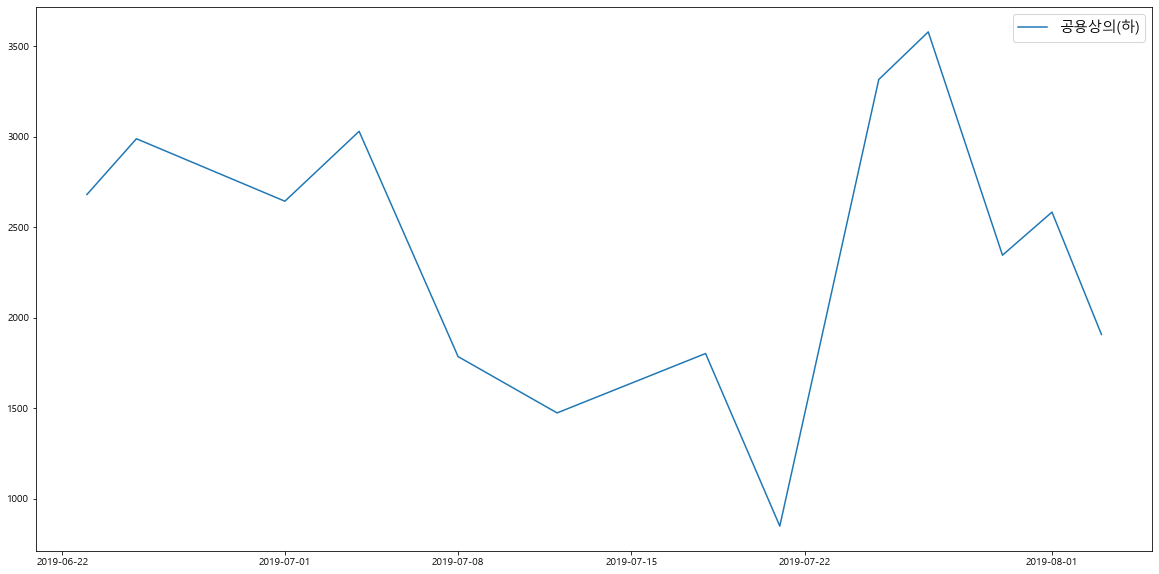

In [22]:
Dsales_day(['공용상의(하)'], month=0)

[]

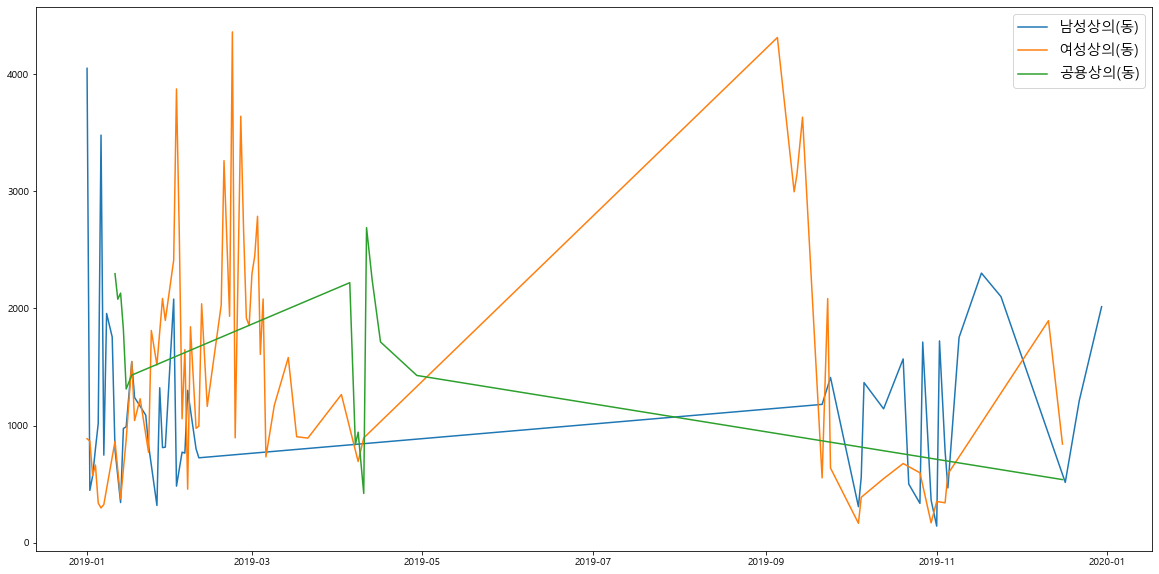

In [23]:
Dsales_day(['남성상의(동)', '여성상의(동)', '공용상의(동)'], month=0)

[]

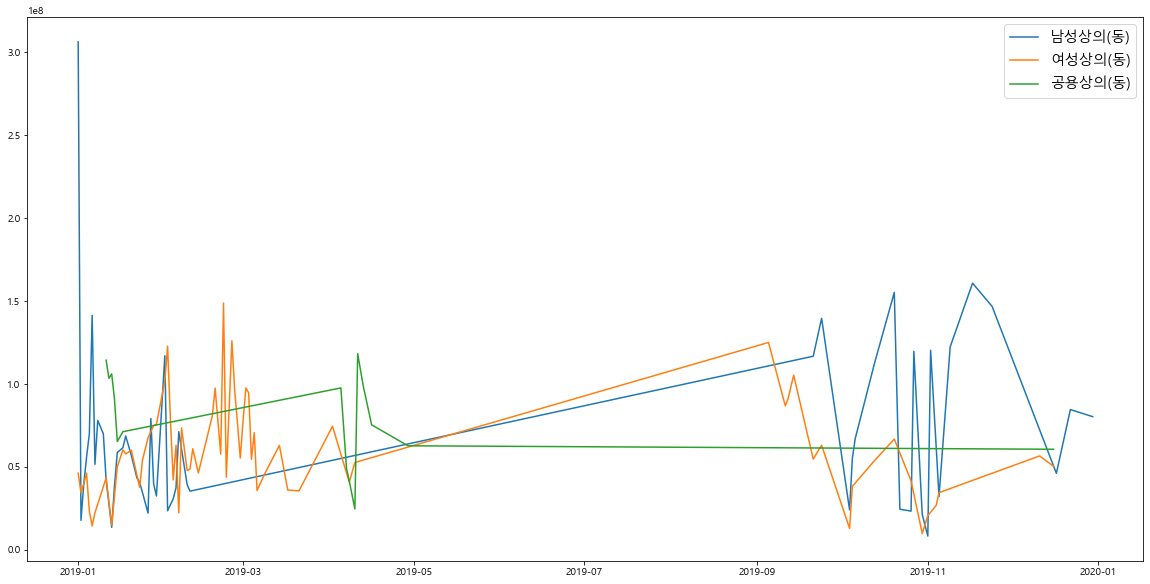

In [24]:
Dsales2_day(['남성상의(동)', '여성상의(동)', '공용상의(동)'], month=0)

[]

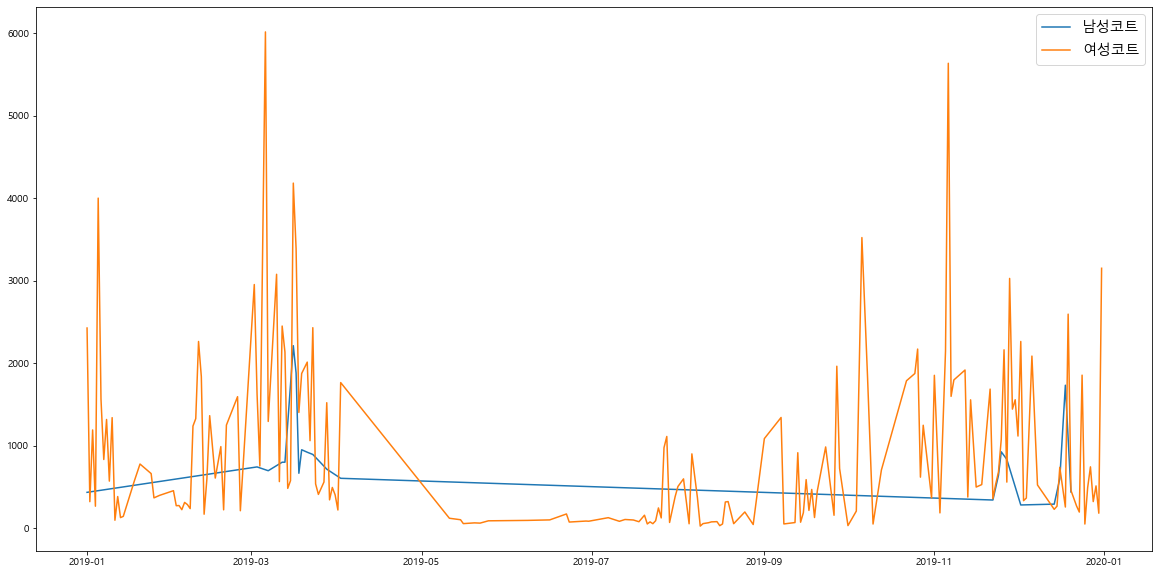

In [25]:
Dsales_day(['남성코트', '여성코트'], month=0)

[]

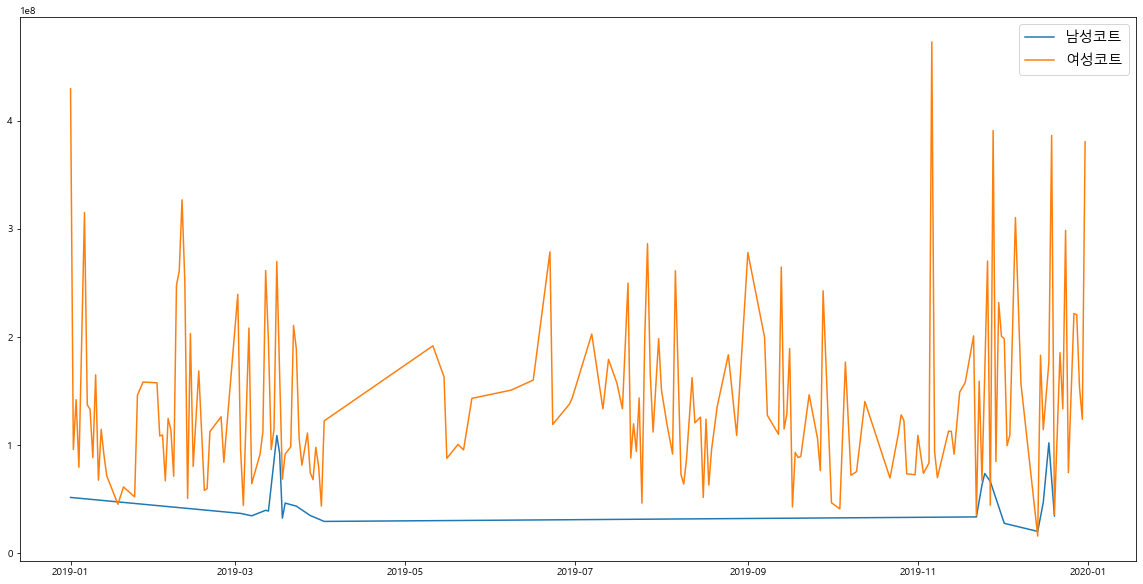

In [26]:
Dsales2_day(['남성코트', '여성코트'], month=0)

[]

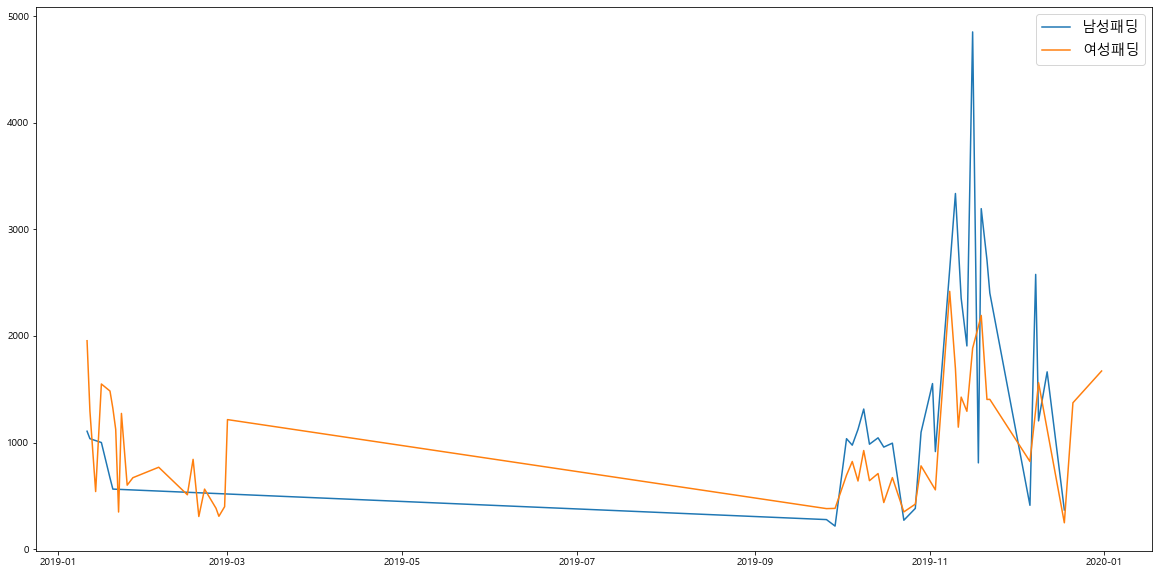

In [27]:
Dsales_day(['남성패딩', '여성패딩'], month=0)

[]

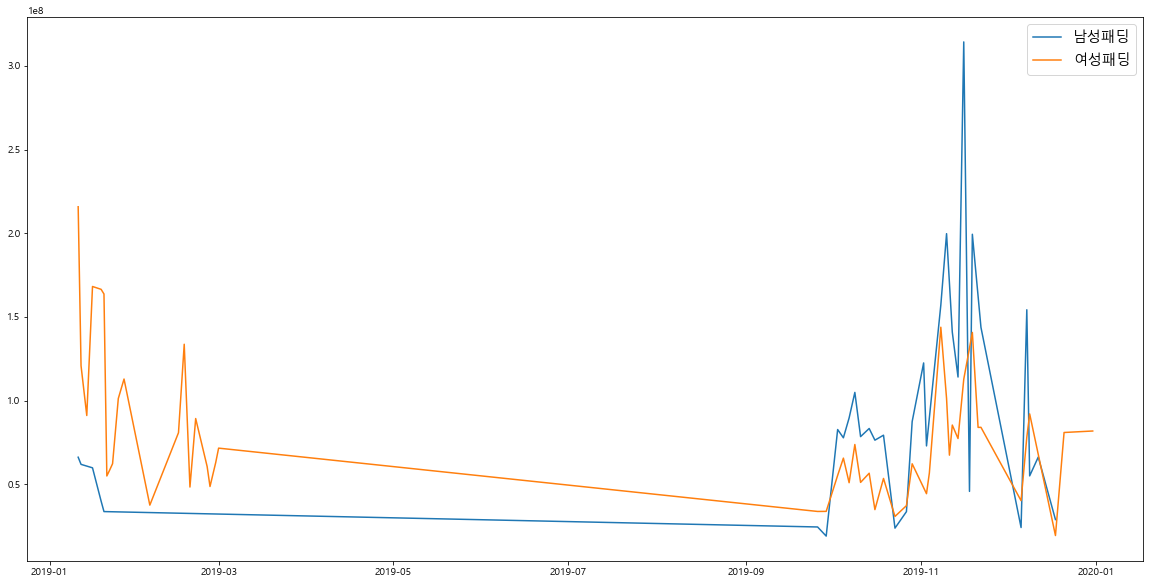

In [28]:
Dsales2_day(['남성패딩', '여성패딩'], month=0)

[]

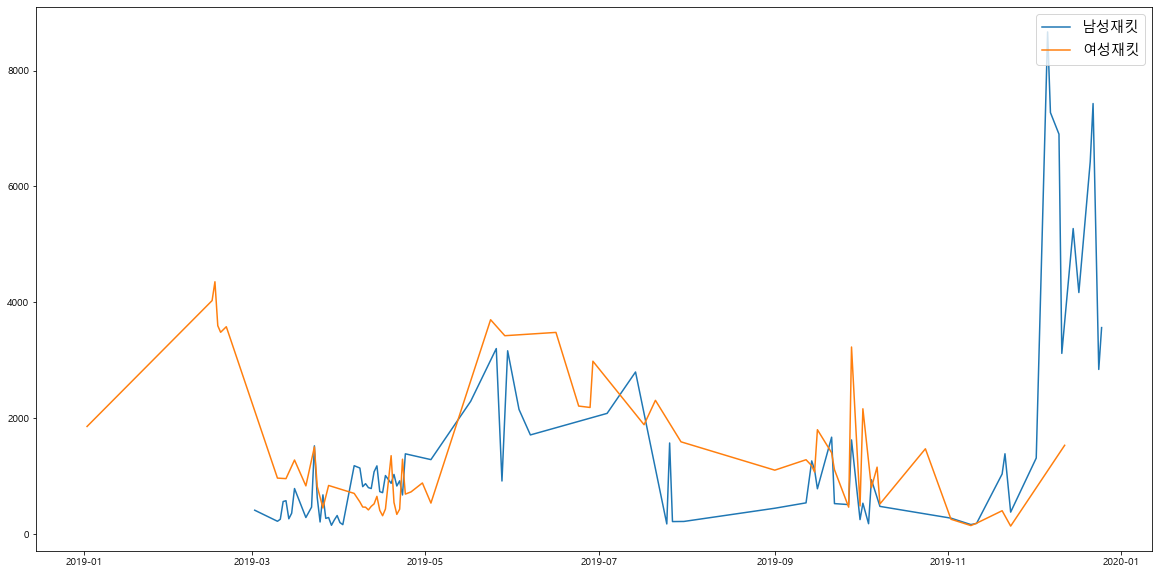

In [29]:
Dsales_day(['남성재킷', '여성재킷'], month=0)

[]

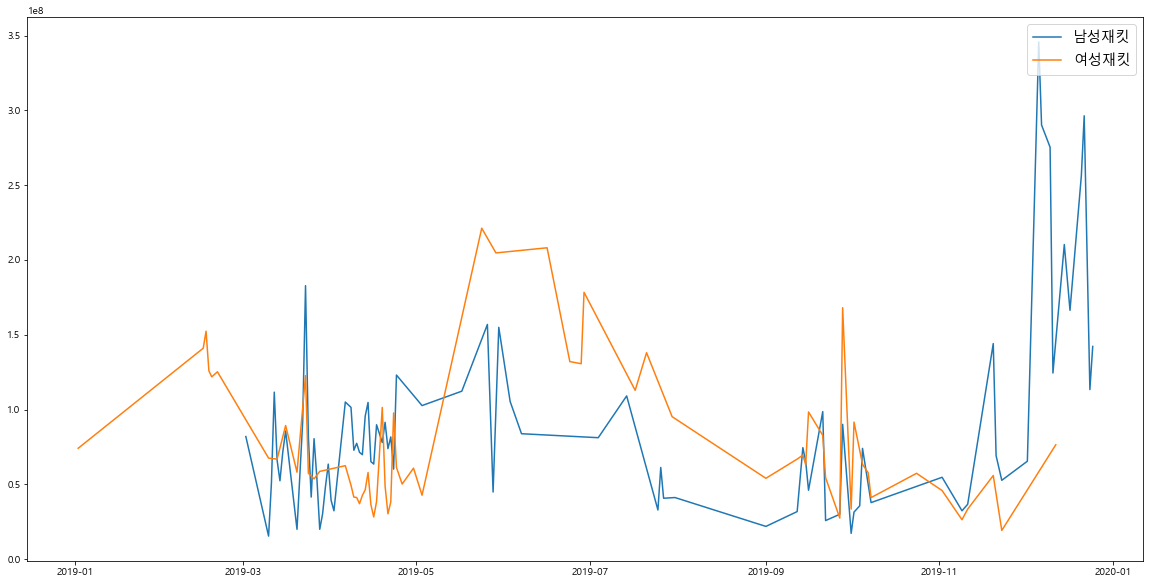

In [31]:
Dsales2_day(['남성재킷', '여성재킷'], month=0)

[]

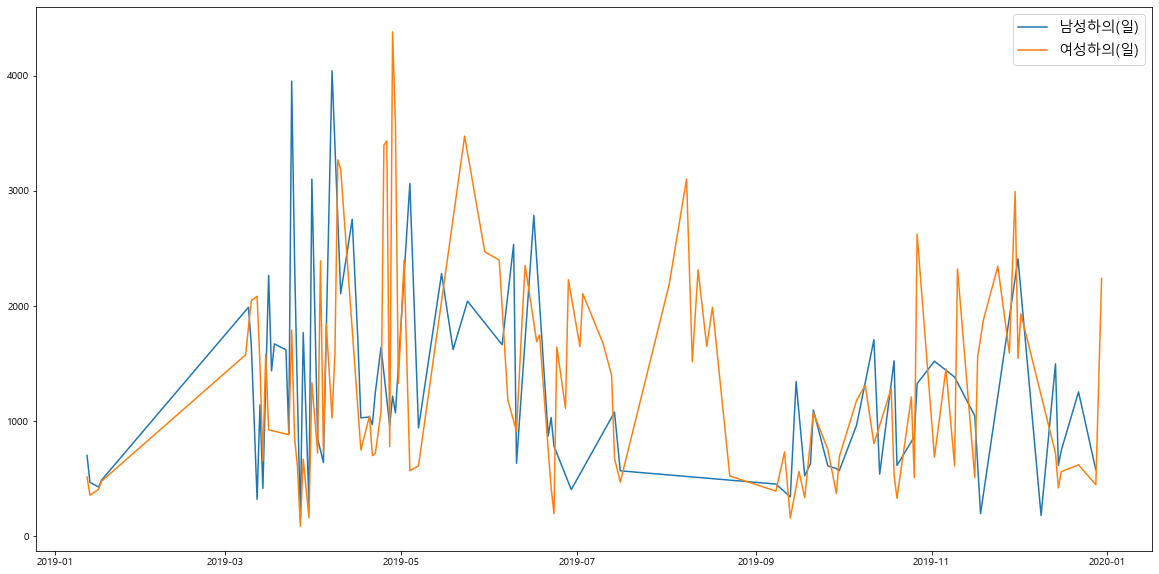

In [35]:
Dsales_day(['남성하의(일)', '여성하의(일)'], month=0)

[]

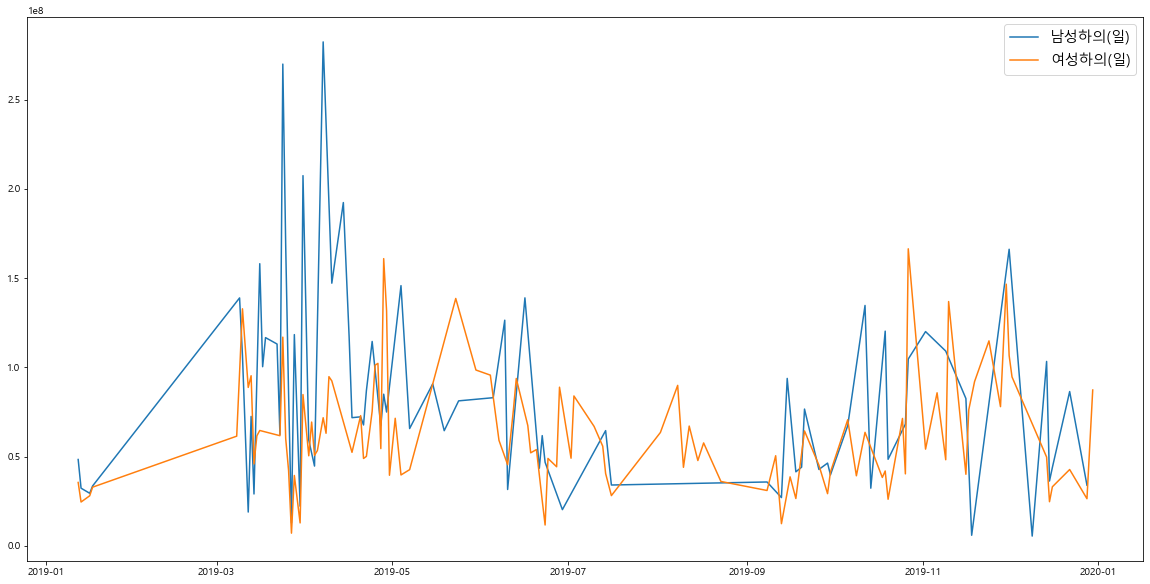

In [36]:
Dsales2_day(['남성하의(일)', '여성하의(일)'], month=0)

[]

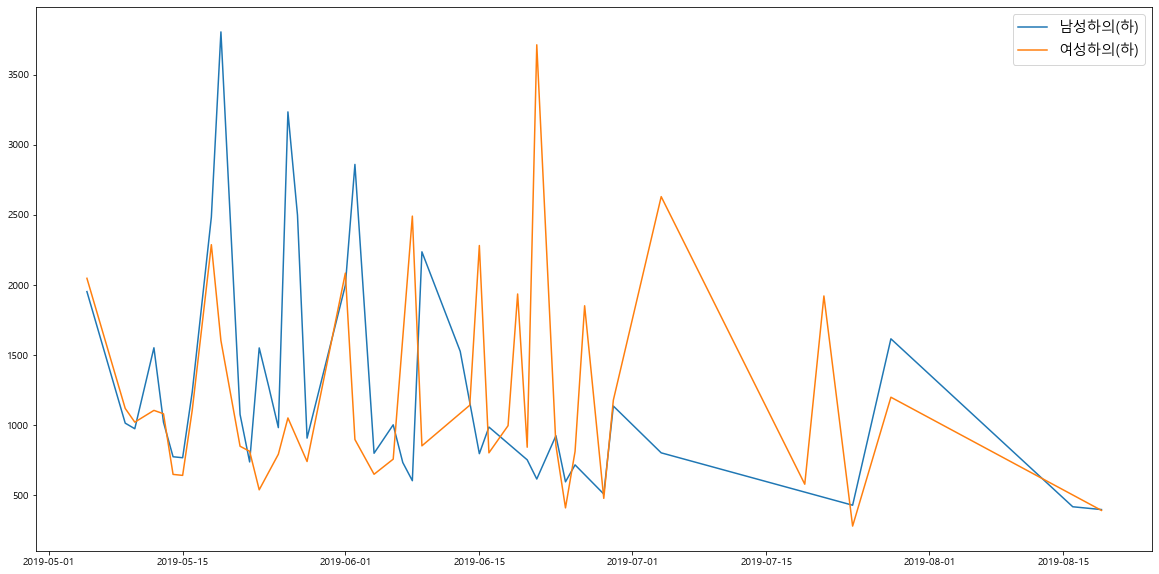

In [37]:
Dsales_day(['남성하의(하)', '여성하의(하)'], month=0)

[]

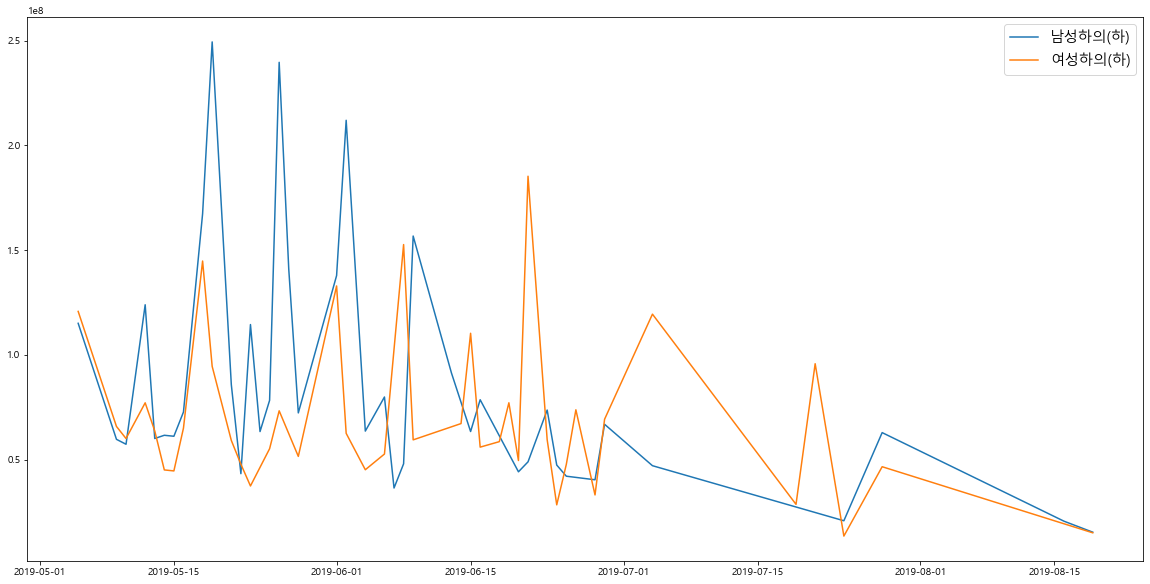

In [38]:
Dsales2_day(['남성하의(하)', '여성하의(하)'], month=0)

[]

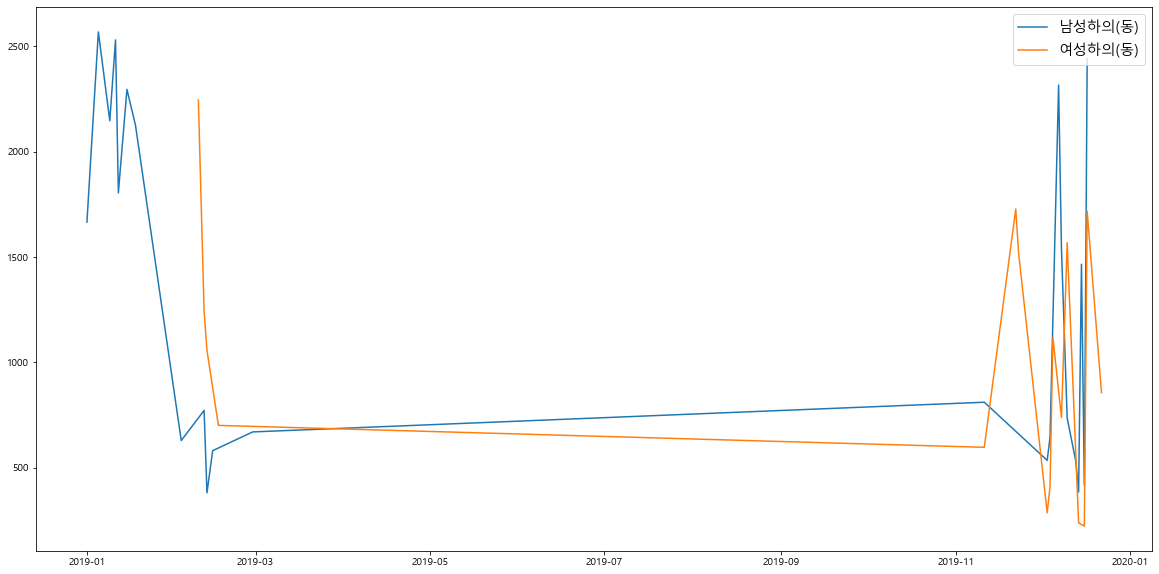

In [39]:
Dsales_day(['남성하의(동)', '여성하의(동)'], month=0)

[]

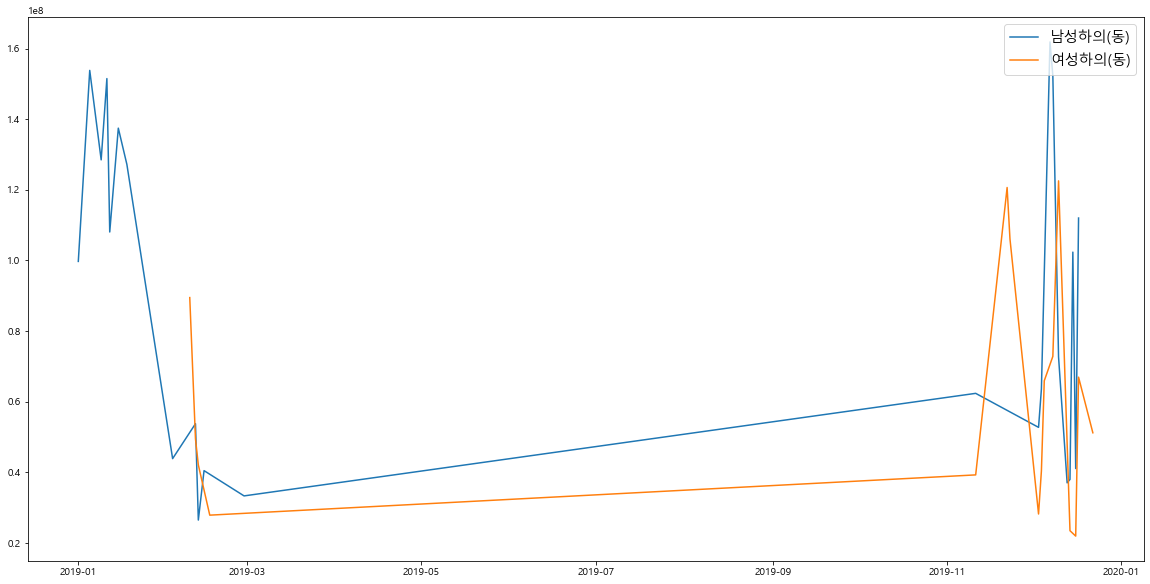

In [40]:
Dsales2_day(['남성하의(동)', '여성하의(동)'], month=0)

[]

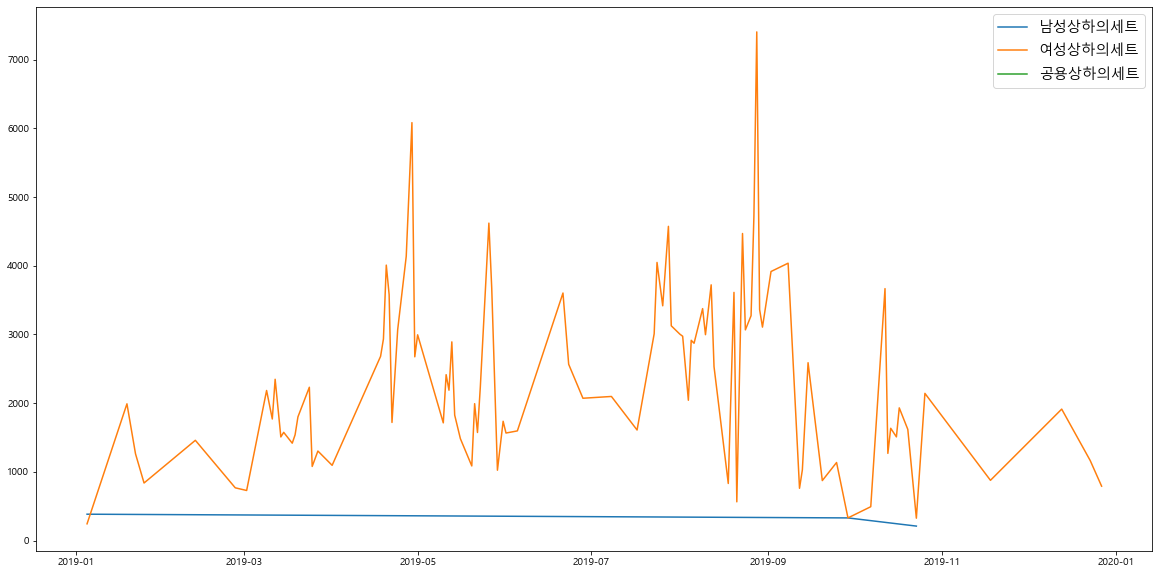

In [41]:
Dsales_day(['남성상하의세트', '여성상하의세트', '공용상하의세트'], month=0)

[]

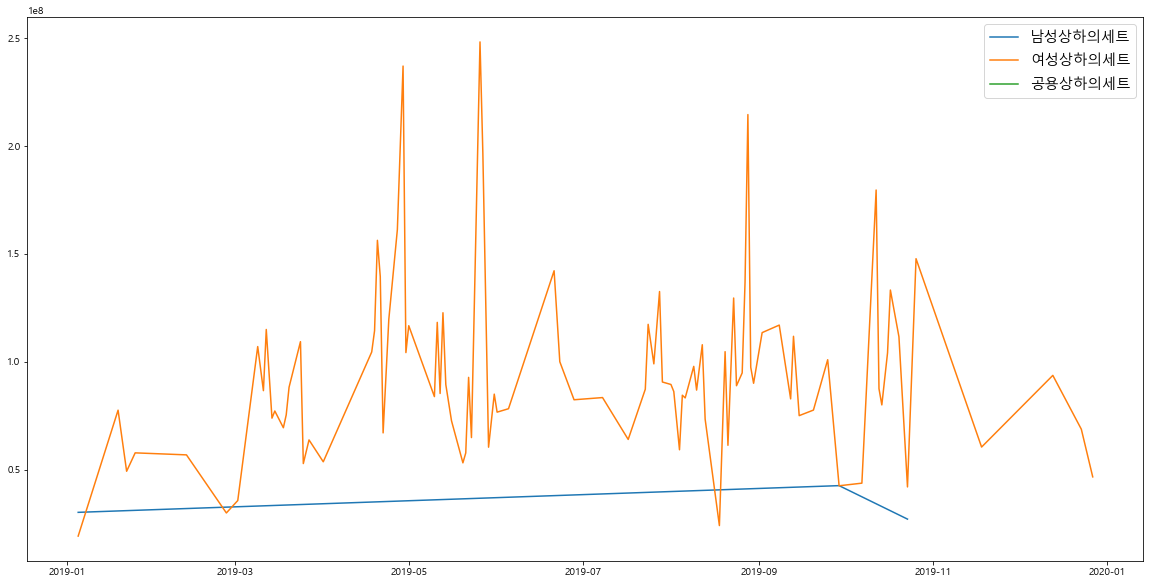

In [42]:
Dsales2_day(['남성상하의세트', '여성상하의세트', '공용상하의세트'], month=0)

[]

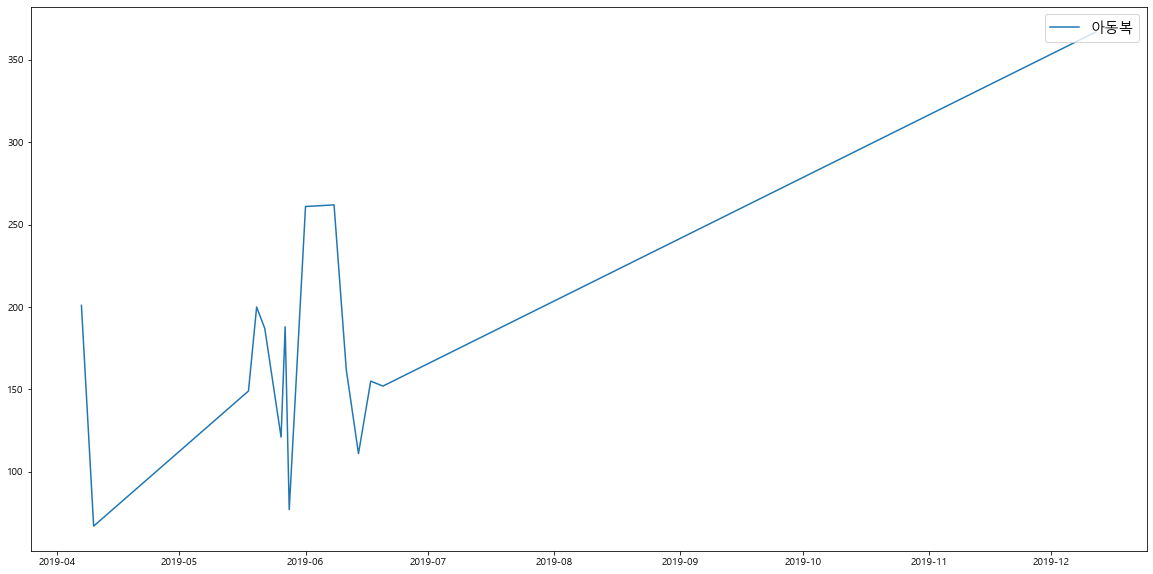

In [43]:
Dsales_day(['아동복'], month=0)

[]

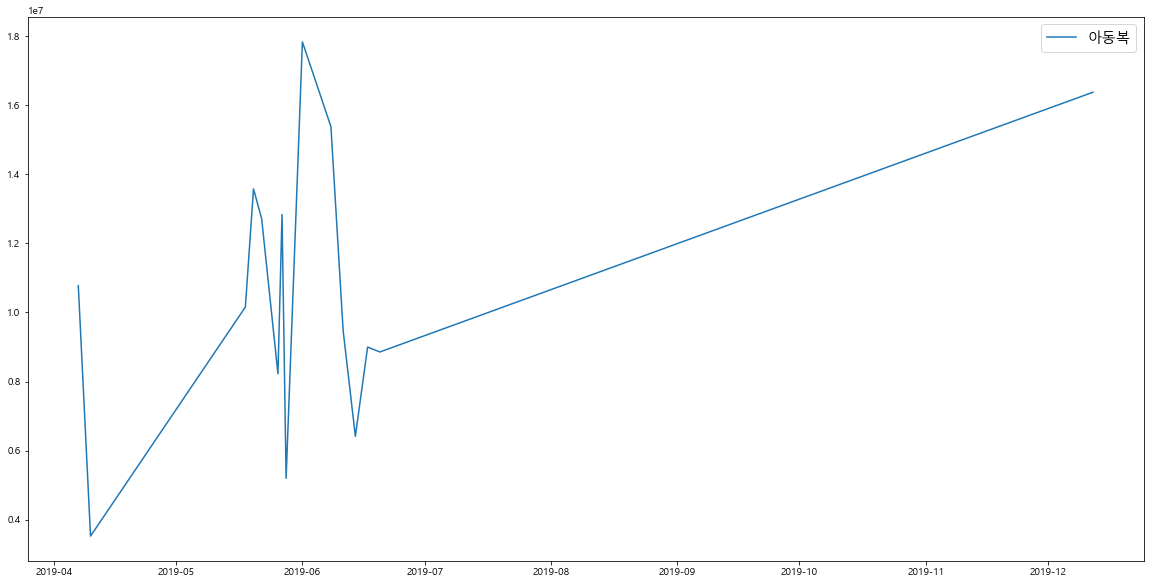

In [44]:
Dsales2_day(['아동복'], month=0)